<h1>아이템 기반 추천 시스템</h1>

<p>
1. 아이템-고객 상호작용 행렬 (item_customer_matrix)는 각 고객이 특정 제품을 구매한 횟수나 수량을 나타내는 행렬입니다. 이 행렬을 기반으로 유사도를 계산합니다.<br/>
2. 아이템 간 코사인 유사도는 cosine_similarity를 사용하여 계산됩니다. 코사인 유사도는 두 벡터 간의 유사도를 측정하는 방법으로, 0은 전혀 유사하지 않음을, 1은 동일함을 의미합니다.<br/>
3. 유사한 아이템 추천은 target_item에 대해 가장 유사한 아이템을 찾아 추천하는 방식입니다.<br/>
</p>

In [19]:
import pandas as pd

# 데이터 로드 (예시)
onlinesales = pd.read_csv('data/Onlinesales_info.csv')

# 아이템-고객 상호작용 행렬 생성
item_customer_matrix = onlinesales.pivot_table(index='제품ID', columns='고객ID', values='수량', aggfunc='sum', fill_value=0)

# 첫 5개 행렬 데이터 확인
print(item_customer_matrix.head())


고객ID          USER_0000  USER_0001  USER_0002  USER_0003  USER_0004  \
제품ID                                                                  
Product_0000          0          0          0          0          0   
Product_0001          0          0          0          0          0   
Product_0002          0          0          0          0          0   
Product_0003          0          0          0          0          0   
Product_0004          0          0          0          0          0   

고객ID          USER_0005  USER_0006  USER_0007  USER_0008  USER_0009  ...  \
제품ID                                                                 ...   
Product_0000          0          0          0          0          0  ...   
Product_0001          0          0          0          0          0  ...   
Product_0002          0          0          1          0          0  ...   
Product_0003          0          0          0          0          0  ...   
Product_0004          0          0          0 

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# 아이템 간 코사인 유사도 계산
item_similarity = cosine_similarity(item_customer_matrix)

# 유사도 행렬을 데이터프레임으로 변환
item_similarity_df = pd.DataFrame(item_similarity, index=item_customer_matrix.index, columns=item_customer_matrix.index)

# 첫 5개 아이템 간 유사도 출력
print(item_similarity_df.head())


제품ID          Product_0000  Product_0001  Product_0002  Product_0003  \
제품ID                                                                   
Product_0000           1.0      0.000000      0.000000      0.000000   
Product_0001           0.0      1.000000      0.369012      0.079212   
Product_0002           0.0      0.369012      1.000000      0.045672   
Product_0003           0.0      0.079212      0.045672      1.000000   
Product_0004           0.0      0.276026      0.238728      0.163984   

제품ID          Product_0004  Product_0005  Product_0006  Product_0007  \
제품ID                                                                   
Product_0000      0.000000      0.000000      0.000000      0.000000   
Product_0001      0.276026      0.195180      0.127802      0.076878   
Product_0002      0.238728      0.045015      0.000000      0.092199   
Product_0003      0.163984      0.028989      0.010847      0.045672   
Product_0004      1.000000      0.151523      0.018898      0.1

In [22]:
# 특정 아이템에 대해 유사한 아이템 추천
target_item = "Product_0000"  # 예시로 제품 ID 1001을 선택

# 유사한 아이템들 (가장 유사한 상위 5개 아이템 추천)
similar_items = item_similarity_df[target_item].sort_values(ascending=False).index[1:6]

print(f"{target_item}와 유사한 아이템들: {similar_items}")


Product_0000와 유사한 아이템들: Index(['Product_0197', 'Product_0956', 'Product_1141', 'Product_0152',
       'Product_0979'],
      dtype='object', name='제품ID')


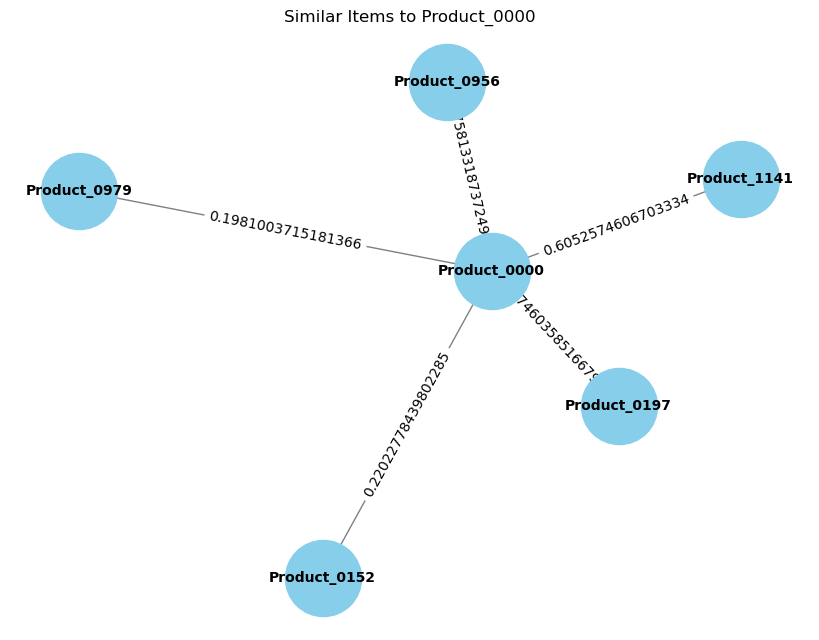

In [27]:
import networkx as nx

# 네트워크 그래프

# 유사도 높은 아이템 추출 (예시: 상위 5개 유사한 아이템)
target_item = "Product_0000"  # 예시로 제품 ID 1001을 선택
similar_items = item_similarity_df[target_item].sort_values(ascending=False).index[1:6]

# 네트워크 그래프 생성
G = nx.Graph()

# 유사도 높은 아이템들 간의 관계 추가
for item in similar_items:
    similarity_score = item_similarity_df[target_item][item]
    G.add_edge(target_item, item, weight=similarity_score)

# 그래프 시각화
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # 노드 배치
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

# 엣지에 유사도 표시
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Similar Items to {target_item}")
plt.show()
